In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [98]:
result_file = '../exp_results/2024_09_03_17_55_58.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

actual_thetas = []
predicted_thetas = []
throttles = []
for l in lines:
    if 'Actual' in l:
        actual = l.split(',')[1:]
        actual = [float(a) for a in actual]
        actual_thetas.append(actual)
    if 'Predicted' in l:
        predicted = l.split(',')[1:]
        predicted = [float(a) for a in predicted]
        predicted_thetas.append(predicted)
    if 'Throttle' in l:
        throttle = l.split(',')[1:]
        throttle = [float(a) for a in throttle]
        throttles.append(throttle)

actual_thetas = np.array(actual_thetas)
predicted_thetas = np.array(predicted_thetas)
throttles = np.array(throttles)

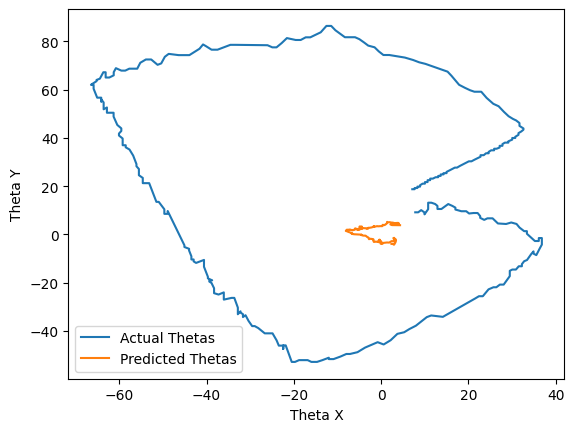

In [99]:
plt.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='Actual Thetas')
plt.xlabel('Theta X')
plt.ylabel('Theta Y')
plt.plot(predicted_thetas[:, 1], predicted_thetas[:, 0], label='Predicted Thetas')
plt.legend()

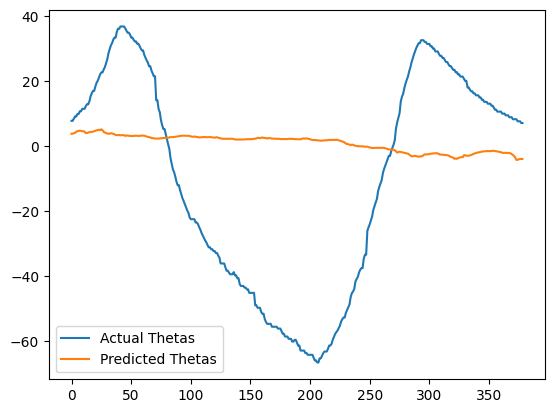

In [100]:
plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 0], label='Actual Thetas')
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 0],  label='Predicted Thetas')
plt.legend()

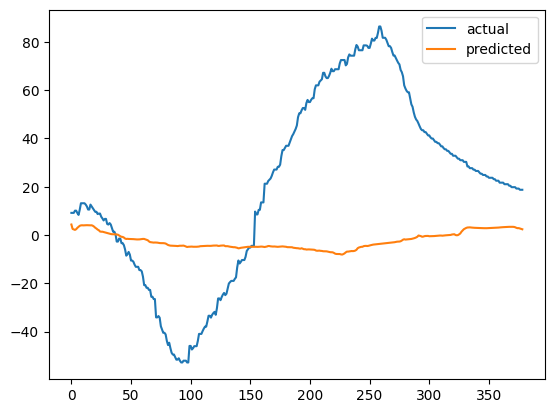

In [101]:

plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 1], label='actual')
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 1], label='predicted')
plt.legend()

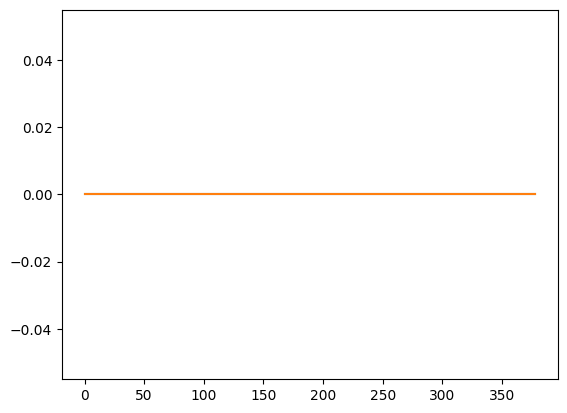

In [102]:
plt.plot(np.arange(len(throttles)), throttles[:, 0])
plt.plot(np.arange(len(throttles)), throttles[:, 1])

In [103]:
np.sqrt(np.mean((actual_thetas[:, 2:] - predicted_thetas[:, 2:])**2))

np.float64(477.24778909250927)

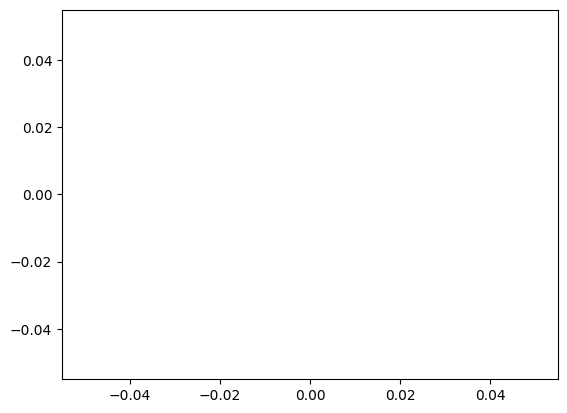

In [79]:
plt.plot(np.arange(len(predicted_thetas))[300:550], predicted_thetas[300:550, 2])
plt.plot(np.arange(len(actual_thetas))[300:550], actual_thetas[300:550, 2])

In [103]:
vel_from_pos = np.diff(predicted_thetas[:, :2], axis=0)
pred_state = np.concatenate([predicted_thetas[:-1, :2], vel_from_pos], axis=1)
np.sqrt(np.mean((actual_thetas[:-1, 2:] - pred_state[:, 2:])**2))

np.float64(273.7898414582535)

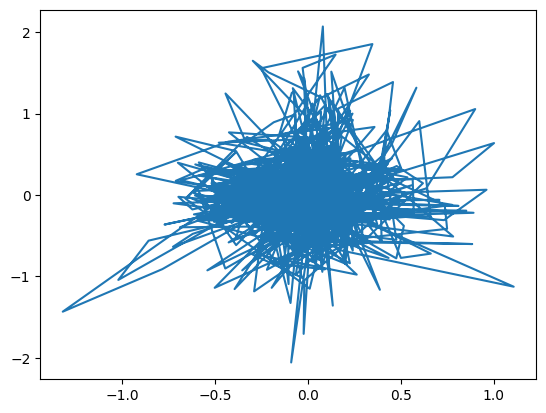

In [17]:
plt.plot(pred_state[:, 2], pred_state[:, 3], label='Predicted Thetas from Vel')

In [18]:
all_data_raw = np.concatenate([actual_thetas, predicted_thetas, throttles], axis=1)
all_data_from_vel = np.concatenate([actual_thetas[:-1], pred_state, throttles[:-1]], axis=1)
df_all_data_raw = pd.DataFrame(all_data_raw, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])
df_all_data_from_vel = pd.DataFrame(all_data_from_vel, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])


In [19]:
df_all_data_raw = df_all_data_raw[(np.abs(df_all_data_raw['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Actual Theta Y Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta Y Vel']) < 150)].dropna()
df_all_data_from_vel = df_all_data_from_vel[(np.abs(df_all_data_from_vel['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_from_vel['Actual Theta Y Vel']) < 150)].dropna()

In [76]:
actual = df_all_data_raw[df_all_data_raw.columns[:4]].values
predicted = df_all_data_raw[df_all_data_raw.columns[4:8]].values
RMSE = np.sqrt(np.mean((actual - predicted)**2))

In [77]:
RMSE

np.float64(6.757917628678529)

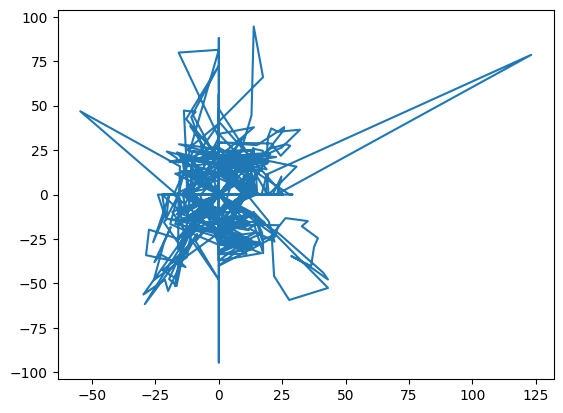

In [74]:
plt.plot(df_all_data_raw['Actual Theta X Vel'], df_all_data_raw['Actual Theta Y Vel'], label='Predicted Thetas from Vel')


In [32]:
# result_file = '../pos_rec/2024_09_03_21_59_14.txt'
result_file = '../pos_rec/2024_09_03_21_58_15_no_filter.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

actual_thetas = []
for l in lines:
    if 'Actual' in l:
        actual = l.split(',')[1:]
        actual = [float(a) for a in actual]
        actual_thetas.append(actual)

actual_thetas = np.array(actual_thetas)

In [65]:
# result_file = '../pos_rec/2024_09_03_22_19_49.txt'
result_file = '../pos_rec/2024_09_05_19_50_50R97.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

bounded_thetas = []
for l in lines:
    if 'Actual' in l:
        bounded = l.split(',')[1:]
        bounded = [float(a) for a in bounded]
        bounded_thetas.append(bounded)

bounded_thetas = np.array(bounded_thetas)

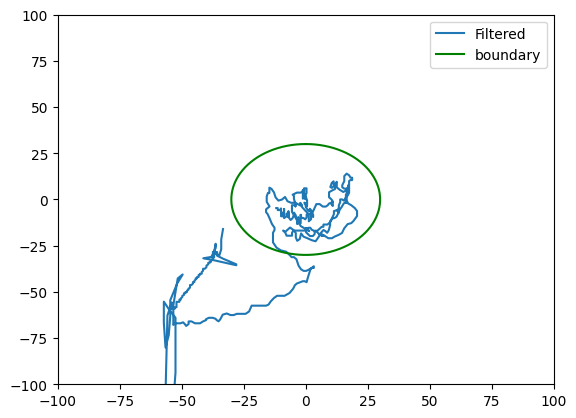

In [66]:
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.plot(bounded_thetas[:, 0], bounded_thetas[:, 1], label='Filtered')
# plt.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='No Filter')
plt.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='boundary', color='g')
plt.legend()

In [3]:
from robo_limb_rl.arch.Q_net import QNet_MLP


In [10]:
theta_x = torch.linspace(-100, 100, 200)
theta_y = torch.linspace(-100, 100, 200)
theta_x_dot = torch.zeros(1)
theta_y_dot = torch.zeros(1)

grid = torch.meshgrid(theta_x, theta_y, theta_x_dot, theta_y_dot)
grid = torch.stack(grid, dim=-1)


In [11]:
model = QNet_MLP(input_dim=4, output_dim=4, reward_type='reg').to('cpu')
model.load_state_dict(torch.load('/home/ansue1234/Research/SML/RobLimbFK/ros_ws/src/model_runner/policies/online_s500000_reg_loss_simple_discrete.cleanrl_model', map_location='cpu', weights_only=True))
model.eval()

QNet_MLP(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=2048, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2048, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=4, bias=True)
  )
)

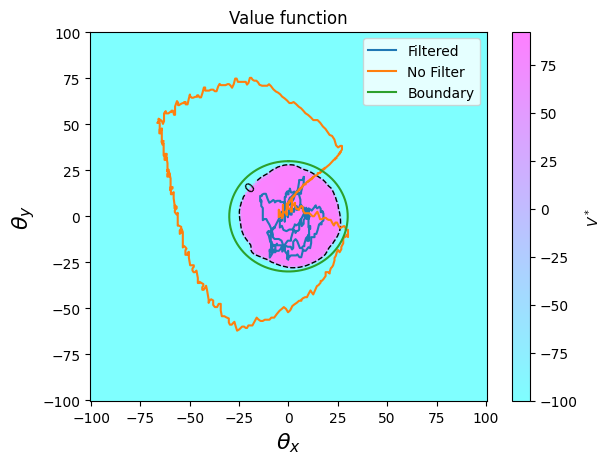

In [36]:
fig, ax = plt.subplots()
states = grid.view(-1, 4)
v_val = model(states).max(dim=-1)[0].detach().numpy().reshape(200, 200, 1, 1)
X = theta_x
Y = theta_y
Z = v_val[:, :, 0, 0]
# Transpose because contourf is weird
Z = Z.T
cmap = plt.get_cmap("cool")
image = ax.pcolormesh(X,Y,Z, cmap=cmap, vmin=Z.min(), vmax=Z.max(), alpha=0.5, edgecolors="none")
CS = ax.contour(X, Y, Z, levels=[0], colors="k", linestyles=["dashed"], linewidths=[1], )
fig.colorbar(image, ax=ax, label=r"$V^*$")
ax.plot(bounded_thetas[:, 0], bounded_thetas[:, 1], label='Filtered')
ax.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='No Filter')

ax.set_xlabel(r"$\theta_x$", fontsize=16)
ax.set_ylabel(r"$\theta_y$", fontsize=16)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title("Value function")
ax.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='Boundary')
plt.legend()




In [76]:
# Compute Statistics
def to_numpy(path):
    result_file = path
    with open(result_file, 'r') as f:
        lines = f.readlines()

    bounded_thetas = []
    for l in lines:
        if 'Actual' in l:
            bounded = l.split(',')[1:]
            bounded = [float(a) for a in bounded]
            bounded_thetas.append(bounded)

    bounded_thetas = np.array(bounded_thetas)
    return bounded_thetas

In [99]:
files = ['2024_09_05_19_33_08R50.txt']
first_outside = []
for f in files:
    bounded_thetas = to_numpy('../pos_rec/processing/' + f)
    # print(bounded_thetas)
    print(np.argmax(np.linalg.norm(bounded_thetas[:,:2], axis=1) > 30))
    first_outside += [np.argmax(np.linalg.norm(bounded_thetas[:, :2], axis=1) > 30)]
avg_first_outside = np.mean(np.array(first_outside))
std_first_outside = np.std(np.array(first_outside))
avg_first_outside, std_first_outside

106


(np.float64(106.0), np.float64(0.0))

In [102]:
x = np.array([0, 50, 80, 85, 87])
y = np.array([71.66, 106, 224.66, 239.25, 290.75])*0.05
y_std = np.array([1.69, 0, 82.44, 28.82, 69.88])*0.05

Text(0, 0.5, 'Time to Reach Unsafe Region (s)')

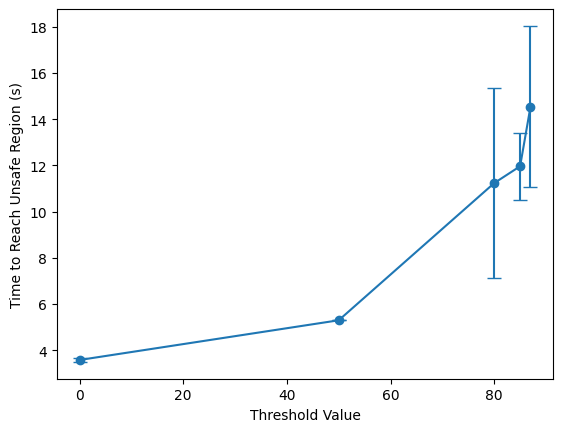

In [111]:
# plot with error bars
# plt.plot(x, y)
plt.errorbar(x, y, yerr=y_std, fmt='o-', capsize=5)
plt.xlabel('Threshold Value')
plt.ylabel('Time to Reach Unsafe Region (s)')